In [1]:
import qspectra as qs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
monomer_ham = qs.VibronicHamiltonian(
    qs.ElectronicHamiltonian([[11500]], dipoles=[[1, 0, 0]], bath=None),
    n_vibrational_levels=[5], vib_energies=[200], elec_vib_couplings=[[-100]],
    energy_spread_extra=None)
monomer = qs.UnitaryModel(monomer_ham, hilbert_subspace='ge', unit_convert=qs.CM_FS)

## Excited state dynamics

In [3]:
n_states = monomer_ham.n_states('e')

In [4]:
%%time 
t, rho = qs.simulate_dynamics(monomer, qs.unit_vec(0, n_states), 1000)

CPU times: user 21.6 ms, sys: 4.12 ms, total: 25.7 ms
Wall time: 23.5 ms


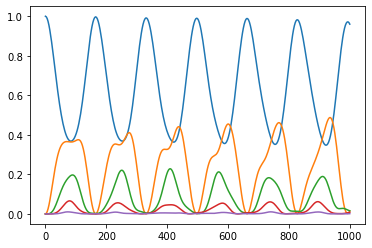

In [5]:
plt.plot(t, np.einsum('tii->ti', rho.reshape(-1, n_states, n_states)).real);

## Absorption spectra

In [6]:
%%time
f, X = qs.absorption_spectra(monomer, 10000, correlation_decay_time=1000)

CPU times: user 110 ms, sys: 9.73 ms, total: 119 ms
Wall time: 109 ms


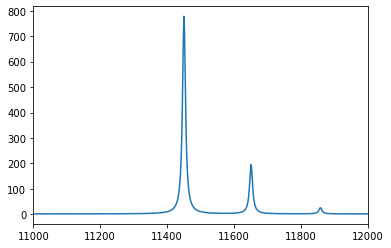

In [7]:
plt.plot(f, X)
plt.xlim(11000, 12000);